In [2]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

In [157]:
# dados_tesouro_principal = pd.read_parquet("./data/sample_investidor_tesouro_direto.parquet")
df_principal = pd.read_parquet("./data/base_completa_investidor_tesouro_direto.parquet")
df = df_principal.copy().sample(n=6000000, random_state=42)
del df_principal
import gc
gc.collect()

0

In [158]:
df

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses
60166422,49554505,04/01/2024,Solteiro(a),M,ESTUDANTE,19,SP,DIADEMA,BRASIL,A,N
41270912,4176931,22/10/2018,Desquitado(a),M,ENGENHEIRO,37,SP,SAO PAULO,BRASIL,D,N
58204395,5006490,24/05/2021,Desquitado(a),M,PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS,58,RN,ITAU,BRASIL,A,N
31813239,260066,24/07/2014,Desquitado(a),M,TECNÓLOGO,44,SP,SAO PAULO,BRASIL,D,N
55756511,4507115,19/02/2019,Solteiro(a),M,OUTROS,27,SP,FERRAZ DE VASCONCELOS,BRASIL,D,N
...,...,...,...,...,...,...,...,...,...,...,...
5145823,15446025,30/11/2020,Solteiro(a),M,OUTROS,37,SP,SANTA BARBARA D'OESTE,BRASIL,D,N
3555366,9115982,05/05/2022,Desquitado(a),M,PROPRIETARIO DE MICROEMPRESAS,38,PE,CARUARU,BRASIL,A,N
40190308,29761924,31/01/2022,Solteiro(a),M,ADVOGADO,39,PI,TERESINA,BRASIL,D,N
32739616,33591184,25/09/2023,Desquitado(a),M,OUTROS,40,SP,OSASCO,BRASIL,A,N


In [159]:
# df = pd.read_parquet("./data/base_completa_investidor_tesouro_direto.parquet")
df['Data de Adesao'] = pd.to_datetime(df['Data de Adesao'], format='%d/%m/%Y')


data_referencia = pd.to_datetime('08/06/2025', dayfirst=True)
diferenca_em_dias = (data_referencia - df['Data de Adesao']).dt.days

# Aproximação de meses (usando média de 30,44 dias por mês)
df['Entrou nos Ultimos 12 Meses'] = diferenca_em_dias <= (12 * 30.44)

In [160]:
df['Rotulo'] = ((df['Operou 12 Meses'] == 'S') & (df['Entrou nos Ultimos 12 Meses'] == True) & (df['Situacao da Conta'] == 'A')).astype(int)

In [161]:
df_investidor_recente_ativo = df[df['Rotulo'] == 1]
print(f"Total de investidores bons: {len(df_investidor_recente_ativo)}")
df_outros = df[df['Rotulo'] == 0]

Total de investidores bons: 67411


In [162]:
df_outros['Rotulo'] = ((df_outros['Operou 12 Meses'] == 'S') & (df_outros['Entrou nos Ultimos 12 Meses'] == True) & (df['Situacao da Conta'] == 'D')).astype(int)

/tmp/ipykernel_1198521/2820979210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outros['Rotulo'] = ((df_outros['Operou 12 Meses'] == 'S') & (df_outros['Entrou nos Ultimos 12 Meses'] == True) & (df['Situacao da Conta'] == 'D')).astype(int)


In [163]:
df_investidor_recente_inativo = df_outros[df_outros['Rotulo'] == 1]
print(f"Total de investidores recentes atrivos: {len(df_investidor_recente_inativo)}")
df_outros = df_outros[df_outros['Rotulo'] == 0]

Total de investidores recentes atrivos: 359


In [164]:
df_outros['Rotulo'] = ((df_outros['Operou 12 Meses'] == 'S') & (df_outros['Entrou nos Ultimos 12 Meses'] == False) & (df['Situacao da Conta'] == 'D')).astype(int)

In [165]:
df_investidor_maduro_inativo = df_outros[df_outros['Rotulo'] == 1]
print(f"Total de investidores recentes atrivos: {len(df_investidor_maduro_inativo)}")
df_outros = df_outros[df_outros['Rotulo'] == 0]

Total de investidores recentes atrivos: 7958


In [166]:
df_outros['Rotulo'] = ((df_outros['Operou 12 Meses'] == 'S') & (df_outros['Entrou nos Ultimos 12 Meses'] == False) & (df['Situacao da Conta'] == 'A')).astype(int)

In [167]:
df_investidor_maduro_ativo = df_outros[df_outros['Rotulo'] == 1]
print(f"Total de investidores recentes atrivos: {len(df_investidor_maduro_ativo)}")
df_outros = df_outros[df_outros['Rotulo'] == 0]

Total de investidores recentes atrivos: 235316


In [168]:
df_outros['Rotulo'] = ((df_outros['Operou 12 Meses'] == 'N') & (df_outros['Entrou nos Ultimos 12 Meses'] == True) & (df['Situacao da Conta'] == 'A')).astype(int)

In [169]:
df_investidor_recente_sem_operacao_conta_ativa = df_outros[df_outros['Rotulo'] == 1]
print(f"Total de investidores recentes atrivos: {len(df_investidor_recente_sem_operacao_conta_ativa)}")
df_outros = df_outros[df_outros['Rotulo'] == 0]

Total de investidores recentes atrivos: 658986


In [170]:
df_outros['Rotulo'] = ((df_outros['Operou 12 Meses'] == 'N') & (df_outros['Entrou nos Ultimos 12 Meses'] == True) & (df['Situacao da Conta'] == 'D')).astype(int)

In [171]:
df_investidor_recente_sem_operacao_conta_inativa = df_outros[df_outros['Rotulo'] == 1]
print(f"Total de investidores recentes atrivos: {len(df_investidor_recente_sem_operacao_conta_inativa)}")
df_outros = df_outros[df_outros['Rotulo'] == 0]

Total de investidores recentes atrivos: 76085


In [172]:
df_outros['Rotulo'] = ((df_outros['Operou 12 Meses'] == 'N') & (df_outros['Entrou nos Ultimos 12 Meses'] == False) & (df['Situacao da Conta'] == 'A')).astype(int)

In [173]:
df_investidor_somente_conta_ativa = df_outros[df_outros['Rotulo'] == 1]
print(f"Total de investidores recentes atrivos: {len(df_investidor_somente_conta_ativa)}")
df_outros = df_outros[df_outros['Rotulo'] == 0]

Total de investidores recentes atrivos: 3055567


In [174]:
df_outros['Rotulo'] = ((df_outros['Operou 12 Meses'] == 'N') & (df_outros['Entrou nos Ultimos 12 Meses'] == False) & (df['Situacao da Conta'] == 'D')).astype(int)

In [175]:
df_investidor_conta_inativa = df_outros[df_outros['Rotulo'] == 1]
print(f"Total de investidores recentes atrivos: {len(df_investidor_conta_inativa)}")
df_outros = df_outros[df_outros['Rotulo'] == 0]

Total de investidores recentes atrivos: 1898318


In [176]:
# df_recorte_2020 = df[df['Data de Adesao'] >= pd.to_datetime('2022-01-01')]

In [177]:
len(df_outros)

0

## Reunindo bases

In [178]:
df_investidor_recente_ativo['tipo de Investidor'] = 'Recente Ativo'
df_investidor_recente_inativo['tipo de Investidor'] = 'Recente Inativo'

df_investidor_maduro_ativo['tipo de Investidor'] = 'Maduro Ativo'
df_investidor_maduro_inativo['tipo de Investidor'] = 'Maduro Inativo'

df_investidor_recente_sem_operacao_conta_ativa['tipo de Investidor'] = 'Recente sem Operação Conta Ativa'
df_investidor_recente_sem_operacao_conta_inativa['tipo de Investidor'] = 'Recente sem Operação Conta Inativa'

df_investidor_somente_conta_ativa['tipo de Investidor'] = 'Somente Conta Ativa'
df_investidor_conta_inativa['tipo de Investidor'] = 'Somente Conta Inativa'


df_tipo_investidores = pd.concat([df_investidor_recente_ativo, 
                                  df_investidor_recente_inativo, 
                                  df_investidor_maduro_ativo, 
                                  df_investidor_maduro_inativo, 
                                  df_investidor_recente_sem_operacao_conta_ativa,
                                  df_investidor_recente_sem_operacao_conta_inativa,
                                  df_investidor_somente_conta_ativa,
                                  df_investidor_conta_inativa
                                  ], ignore_index=True)

/tmp/ipykernel_1198521/570275554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_investidor_recente_ativo['tipo de Investidor'] = 'Recente Ativo'


In [179]:
df_tipo_investidores.head()

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses,Entrou nos Ultimos 12 Meses,Rotulo,tipo de Investidor
0,34414132,2024-09-20,Solteiro(a),M,DESENHISTA INDUSTRIAL,22,RS,CAXIAS DO SUL,BRASIL,A,S,True,1,Recente Ativo
1,58662568,2025-01-08,Solteiro(a),F,"BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",25,MG,BELO HORIZONTE,BRASIL,A,S,True,1,Recente Ativo
2,59803151,2025-03-10,Solteiro(a),F,ADMINISTRADOR,22,RJ,RIO DE JANEIRO,BRASIL,A,S,True,1,Recente Ativo
3,59165900,2025-01-31,Solteiro(a),M,MÚSICO,38,SP,BARUERI,BRASIL,A,S,True,1,Recente Ativo
4,54169372,2024-07-26,Desquitado(a),M,MOTORISTA DE VEICULOS DE TRANSPORTE DE CARGA,33,SP,SAO PAULO,BRASIL,A,S,True,1,Recente Ativo


In [180]:
profissoes_agrupadas = {
    "Não CLTs": ["PROFISSIONAL LIBERAL", 'TRABALHADOR AUTÔNOMO'],
    "Outros": [
        "OUTROS", "Não se aplica", "FALECIDO"
    ],
    "Aposentados e Pensionistas": [
        "APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)",
        "FUNCIONÁRIO PÚBLICO CIVIL APOSENTADO",
        "MILITAR REFORMADO", "PENSIONISTA"
    ],
    "Estudantes e Bolsistas": [
        "BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS", "ESTUDANTE"
    ],
    "Funcionários Públicos": [
        "SERVIDOR PÚBLICO FEDERAL", "SERVIDOR PÚBLICO MUNICIPAL", "SERVIDO PÚBLICO ESTADUAL",
        "FUNCIONÁRIO PÚBLICO CIVIL APOSENTADO",
        "OCUPANTE DE CARGO DE DIREÇAO E ASSESSORAMENTO SUPERIOR",
        "OCUPANTE DE CARGO DE DIREÇAO E ASSESSORAMENTO INTERMEDIÁRIO",
        "MEMBRO DO PODER JUDICIÁRIO: MINISTRO DE TRIB. SUPERIOR",
        "MEMBRO DO PODER LEGISLATIVO: SENADOR, DEP.FED.E ESTADUAL",
        "MEMBRO DO PODER EXECUTIVO: PRES.REPÚBLICA, MINISTRO ETC.",
        "DELEGADO DE POLÍCIA", "FISCAL"
    ],
    "Profissionais da Saúde": [
        "MÉDICO", "ODONTÓLOGO E DENTISTA", "ENFERMEIRO E NUTRICIONISTA",
        "FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL", "FARMACÊUTICO", "FONOAUDIÓLOGO",
        "PSICÓLOGO", "BIÓLOGO E BIOMÉDICO", "TÉCNICO DE LABORATÓRIO E RAIO X", 'PROTÉTICO', 'VETERINÁRIO E ZOOTECNISTA'
    ],
    "Engenharia e Tecnologia": [
        "ENGENHEIRO", "TÉCNICO DE MECÂNICA", "TÉCNICO DE ELETRICIDADE, ELETRÔNICA E TELECOMUNICAÇÕES",
        "TÉCNICO DE QUÍMICA", "TÉCNICO DE CONTABILIDADE E DE ESTATÍSTICA",
        "TÉCNICO EM AGRONOMIA E AGRIMENSURA", "TECNOLOGO", "ANALISTA DE SISTEMAS", 'ARQUITETO',
        'TECNÓLOGO'
    ],
    "Direito e Justiça": [
        "ADVOGADO", "PROCURADOR E ASSEMELHADOS", "SERVENTUÁRIO DE JUSTIÇA", "TABELIÃO"
    ],
    "Educação e Pesquisa": [
        "PROFESSOR DE ENSINO SUPERIOR", "PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS",
        "DIRETOR DE ESTABELECIMENTO DE ENSINO",
        'BIBLIOTECÁRIO, ARQUIVISTA, MUSEÓLOGO E ARQUEÓLOGO', 'SOCIÓLOGO',
        'OUTROS TRABALHADORES DE NÍVEL SUPERIOR LIGADOS AO ENSINO'
    ],
    "Ciências Exatas e Humanas": [
        "ECONOMISTA", "SOCIOLOGO", "ESTATÍSTICO", "FÍSICO", "GEÓGRAFO", "GEÓLOGO",
        "ATUÁRIO E MATEMÁTICO"
    ],
    "Comércio e Vendas": [
        "VENDEDOR PRACISTA, REPRESENTANTE COMERCIAL, CAIXEIRO VIAJANTE",
        "VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA", "SECURITÁRIO",
        "CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",
        "FEIRANTE", "JORNALEIRO", "SUPERIOR, INSPETOR E AGENTE DE COMPRAS E VENDAS",'DEMONSTRADOR'
    ],
    "Artes, Comunicação e Entretenimento": [
        "JORNALISTA", "PUBLICITÁRIO", "COMUNICÓLOGO", "RELAÇÕES PÚBLICAS",
        "ATOR E DIRETOR DE ESPETÁCULOS PÚBLICOS", "CANTOR E COMPOSITOR", "MÚSICO",
        "LOCUTOR E COMENTARISTA DE RÁDIO E TELEVISÃO E RADIALISTA",
        "DESENHISTA COMERCIAL", "DESENHISTA TÉCNICO", "DESENHISTA INDUSTRIAL",
        "DECORADOR", "MODELO DE MODAS", "COREÓGRAFO E BAILARINO",
        "PROFISSIONAIS DE LETRAS E DE ARTES", "ESCULTOR, PINTOR E ASSEMELHADOS",
        "DIPLOMATA", "AGENCIADOR DE PROPAGANDA", "OPERADOR DE CÂMARA DE CINEMA E TELEVISÃO"
    ],
    "Administração e Negócios": [
        "ADMINISTRADOR", "GERENTE", "DIRETOR DE EMPRESAS", "COORDENADOR E SUPERVISOR",
        "CONSULTOR", "EMPRESÁRIO", "EMPRESÁRIO ARTÍSTICO E PRODUTOR DE ESPETÁCULOS PÚBLICOS"
    ],
    "Contabilidade e Finanças": [
        "BANCARIO E ECONOMIÁRIO", "CONTADOR", "TRABALHADOR DOS SERVIÇOS DE CONTABILIDADE, DE CAIXA"
    ],
    "Transportes e Logística": [
        "PILOTO DE AERONAVES", "MOTORISTA DE VEÍCULOS DE TRANSPORTE DE PASSAGEIROS",
        "MOTORISTA DE VEICULOS DE TRANSPORTE DE CARGA", "COMISSÁRIO DE BORDO",
        "MAQUINISTA E FOGUISTA DE EMBARCAÇÕES, LOCOMOTIVAS", "COMANDANTE DE EMBARCAÇOES",
        "CONTRAMESTRE DE EMBARCAÇÕES", 'MARINHEIRO E ASSEMELHADOS'
    ],
    "Trabalho Operacional e Técnicos": [
        "MECÂNICO DE MANUTENÇÃO DE VEÍCULOS AUTOMÓVEIS E MÁQUINAS",
        "ELETRICISTA E ASSEMELHADOS", "LANTERNEIRO E PINTOR DE VEÍCULOS METÁLICOS",
        "ELETRICISTA DE MANUTENÇÃO DE VEÍCULOS AUTOMOTORES MÁQUINAS",
        "MECANICO DE MANUTENÇÃO, MONTADOR, PREPARADOR, OPERADOR"
    ],
    "Serviços Gerais": [
        "AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS", "AGENTE ADMINISTRATIVO",
        "PORTEIRO DE EDIFÍCIO, ASCENSORISTA, GARAGISTA E FAXINEIRO",
        "SECRETARIO, ESTENÓGRAFO, DATILÓGRAFO, RECEPCIONISTA,TELEF.",
        "EMPREGADO DOMÉSTICO", "AUXILIAR DE LABORATORIO", "GOVERNANTA DE HOTEL, CAMAREIRO, PORTEIRO, COZINHEIRO"
    ],
    "Religião e Assistência Social": [
        "SACERDOTE OU MEMBRO DE ORDENS OU SEITAS RELIGIOSAS", "ASSISTENTE SOCIAL"
    ],
    "Forças de Segurança e Defesa": [
        "MILITAR EM GERAL", "OFICIAIS DAS FORÇAS ARMADAS E FORÇAS AUXILIARES", "BOMBEIRO"
    ],
    "Proprietários e Renda Passiva": [
        "PROPRIETÁRIO DE ESTABELECIMENTO INDUSTRIAL",
        "PROPRIETÁRIO DE ESTABELECIMENTO COMERCIAL",
        "PROPRIETÁRIO DE ESTABELECIMENTO DE PRESTAÇÃO DE SERVIÇOS",
        "PROPRIETARIO DE MICROEMPRESAS",
        "PROPRIETÁRIO DE IMÓVEL (RECEBENDO RENDIMENTO DE ALUGUEL)",
        "PROPRIETÁRIO DE ESTABELECIMENTO AGRÍCOLA, DA PECUÁRIA",
        "CAPITALISTA, RECEBENDO RENDIMENTO DE APLICAÇÃO DE CAPITAL"
    ],
    "Trabalhadores Rurais e Agropecuários": [
        "TRABALHADOR AGRÍCOLA", "TRABALHADOR DA PECUÁRIA", "AGRONOMO",
        "TÉCNICO EM AGRONOMIA E AGRIMENSURA", "GARIMPEIRO", "TRABALHADOR FLORESTAL", 'TRABALHADOR DA PESCA'
    ],
    "Trabalho Industrial e Produção": [
        "TRABALHADOR DE CONSTRUÇÃO CIVIL", "TRABALHADOR METALÚRGICO E SIDERÚRGICO",
        "TRABALHADOR DE FABRICAÇÃO DE ROUPAS", "TRABALHADOR DE FABRICAÇÃO DE PRODUTOS DE BORRACHA E PLÁSTICO",
        "TRABALHADOR DE FABRICAÇÃO E PREPARAÇÃO DE ALIMENTOS BEBIDAS",
        "TRABALHADOR DE FABRICAÇÃO DE PRODUTOS TÊXTEIS", "TRABALHADOR DE USINAGEM E METAIS",
        "TRABALHADOR DE FABRICAÇÃO DE CALÇADOS E ARTEFATOS DE COURO",
        "TRABALHADOR DE FABRICAÇÃO DE PAPEL E PAPELÃO", "TRABALHADOR DE ARTES GRÁFICAS",
        "TRABALHADOR DE INSTALAÇÕES DE PROCESSAMENTO QUÍMICO",
        "TRABALHADOR DE TRATAMENTO DE FUMO E DE FABR. CIGARROS",
        "TRABALHADOR DE FABRICAÇÃO DE ARTEFATOS DE MADEIRA"
    ],
    "Serviços Específicos": [
        "CABELEIREIRO, BARBEIRO, MANICURE, PEDICURE, MAQUILADOR",
        "LEILOEIRO, AVALIADOR E ASSEMELHADOS", "DESPACHANTE, INCLUSIVE O ADUANEIRO",
        "AGENTE DE SERVIÇOS FUNERÁRIOS E EMBALSAMADOR", "AGENTE DE VIAGEM E GUIA DE TURISMO"
    ],
    "Ciências Naturais e Exatas": [
        "ASTRÔNOMO E METEOROLOGISTA", "QUIMICO", "TÉCNICO DE BIOLOGIA"
    ],
    "Artesanato e Joalheria": [
        "JOALHEIROS E OURIVES", "ALFAIATE"
    ],
    "Esporte": [
        "ATLETA PROFISSIONAL E TÉCNICO EM DESPORTOS"
    ],
    "Carga e Logística Manual": [
        "ESTIVADOR, CARREGADOR, EMBALADOR E ASSEMELHADOS"
    ],
    "Direção e Liderança": [
        "CHEFE INTERMEDIÁRIO", "MESTRE E CONTRAMESTRE"
    ]
}
# Primeiro, invertemos o dicionário: cada profissão vira uma chave apontando para sua área
profissao_para_grupo = {}
for grupo, profissoes in profissoes_agrupadas.items():
    for profissao in profissoes:
        profissao_para_grupo[profissao] = grupo

# Agora aplicamos isso no DataFrame
df_tipo_investidores['Grupo_Profissao'] = df_tipo_investidores['Profissao'].map(profissao_para_grupo)


In [181]:
macrogrupo_para_grupos = {
    'Economia, Negócios e Administração': [
        'Contabilidade e Finanças',
        'Administração e Negócios',
        'Comércio e Vendas',
        'Proprietários e Renda Passiva',
        'Direção e Liderança'
    ],
    'Serviços Públicos e Segurança': [
        'Funcionários Públicos',
        'Forças de Segurança e Defesa',
        'Religião e Assistência Social',
        'Direito e Justiça'
    ],
    'Educação, Ciência e Pesquisa': [
        'Educação e Pesquisa',
        'Ciências Naturais e Exatas',
        'Ciências Exatas e Humanas',
        'Estudantes e Bolsistas'
    ],
    'Saúde e Bem-estar': [
        'Profissionais da Saúde',
        'Aposentados e Pensionistas'
    ],
    'Engenharia, Tecnologia e Produção': [
        'Engenharia e Tecnologia',
        'Trabalho Industrial e Produção'
    ],
    'Arte, Cultura e Comunicação': [
        'Artes, Comunicação e Entretenimento',
        'Artesanato e Joalheria'
    ],
    'Serviços Gerais e Técnicos': [
        'Serviços Gerais',
        'Serviços Específicos',
        'Trabalho Operacional e Técnicos'
    ],
    'Transporte e Logística': [
        'Transportes e Logística',
        'Carga e Logística Manual'
    ],
    'Agricultura e Meio Rural': [
        'Trabalhadores Rurais e Agropecuários'
    ],
    'Esporte': [
        'Esporte'
    ],
    'Outros': [
        'Outros'
    ],
    'Nao CLTs': [
        'Não CLTs'
    ]
}

# 2. Mapeia o grupo para o macrogrupo
grupo_para_macrogrupo = {}
for macro, grupos in macrogrupo_para_grupos.items():
    for grupo in grupos:
        grupo_para_macrogrupo[grupo] = macro

# 3. Aplica os mapeamentos no DataFrame
df_tipo_investidores['Macrogrupo_Profissao'] = df_tipo_investidores['Grupo_Profissao'].map(grupo_para_macrogrupo)



In [182]:
df_tipo_investidores = df_tipo_investidores.drop(columns=['Entrou nos Ultimos 12 Meses', 'Rotulo'])

In [185]:
df_tipo_investidores['tipo de Investidor'].unique()

array(['Recente Ativo', 'Recente Inativo', 'Maduro Ativo',
       'Maduro Inativo', 'Recente sem Operação Conta Ativa',
       'Recente sem Operação Conta Inativa', 'Somente Conta Ativa',
       'Somente Conta Inativa'], dtype=object)

In [187]:
df_tipo_investidores['Genero'].unique()

array(['M', 'F', 'N'], dtype=object)

In [184]:
df_tipo_investidores.to_csv("./data/base_tesouro_direto_macro_profissoes_tipo_investidor.csv", sep=';')

In [55]:
df_tipo_investidores.dtypes

Codigo do Investidor             int64
Data de Adesao          datetime64[ns]
Estado Civil                     int64
Genero                           int64
Profissao                        int64
Idade                            int64
UF do Investidor                 int64
Cidade do Investidor             int64
Pais do Investidor               int64
Situacao da Conta                int64
Operou 12 Meses                  int64
tipo de Investidor               int64
dtype: object

In [56]:
# Encoding de variáveis categóricas (transformado em numeros inteiros)
label_encoders = {}
for col in df_tipo_investidores.select_dtypes(include=['object','datetime64[ns]']).columns:
    le = LabelEncoder()
    df_tipo_investidores[col] = le.fit_transform(df_tipo_investidores[col])
    label_encoders[col] = le

X = df_tipo_investidores.drop(columns=['tipo de Investidor'])
y = df_tipo_investidores['tipo de Investidor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% Treino e 30%Teste

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print("Treinamento com arvore de decisao finalizado")
print("Acurácia Decision Tree:", accuracy_score(y_test, pred_dt))

# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=3)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Treinamento com arvore de decisao aleatoria finalizado")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',n_estimators=100,max_depth=3,learning_rate=0.2, tree_method='gpu_hist')
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print("Treinamento com XGBOOST finalizado")

# CatBoost
cb = CatBoostClassifier(verbose=0, task_type="GPU")
cb.fit(X_train, y_train)
pred_cb = cb.predict(X_test)
print("Treinamento com CATBOOST finalizado")

# Avaliação
print("Acurácia Decision Tree:", accuracy_score(y_test, pred_dt))
print("Acurácia Random Forest:", accuracy_score(y_test, pred_rf))
print("Acurácia XGBoost:", accuracy_score(y_test, pred_xgb))
print("Acurácia CatBoost:", accuracy_score(y_test, pred_cb))

#Será que 90% é bom? Vamos analisar com mais detalhes os resultados a seguir.

Treinamento com arvore de decisao finalizado
Acurácia Decision Tree: 1.0
Treinamento com arvore de decisao aleatoria finalizado


/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:07:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:07:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [12:07:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self

Treinamento com XGBOOST finalizado
Treinamento com CATBOOST finalizado
Acurácia Decision Tree: 1.0
Acurácia Random Forest: 0.998149873002451
Acurácia XGBoost: 0.9998664856805892
Acurácia CatBoost: 0.9997965496085169


/tmp/ipykernel_502503/510692250.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<module 'matplotlib.pyplot' from '/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

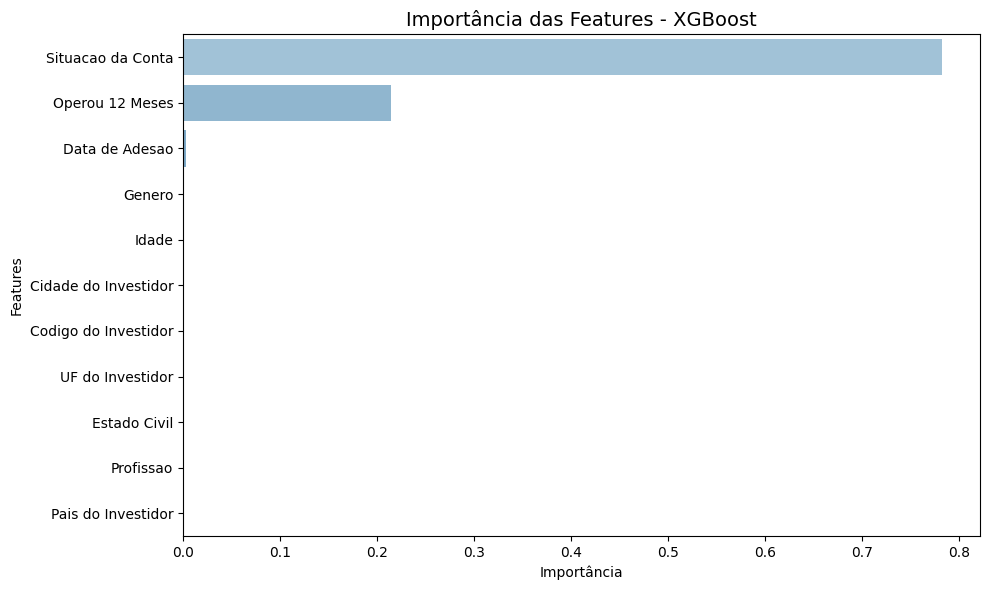

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importância das características - XGBoost (você colocou 'Random Forest' no título, mas está usando xgb)
importances = xgb.feature_importances_
features = X.columns

# Cria um DataFrame para facilitar a ordenação
df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Ordena de maior para menor
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Plotando
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=df_importance,
    palette='Blues_d'
)
plt.title('Importância das Features - XGBoost', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Features')
plt.tight_layout()
plt
